In [149]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving healthcare-dataset-stroke-data (2).csv to healthcare-dataset-stroke-data (2) (6).csv
User uploaded file "healthcare-dataset-stroke-data (2) (6).csv" with length 322268 bytes


In [150]:
import numpy as np
import pandas as pd

data=pd.read_csv("healthcare-dataset-stroke-data (2).csv")

In [151]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [152]:
data.shape
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.2,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,35.2,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [153]:
print(data.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


Data Augmentation

In [154]:
print("gender:",set(data["gender"]))
print("ever_married:",set(data["ever_married"]))
print("work_type:",set(data["work_type"]))
print("Residence_type:",set(data["Residence_type"]))
print("smoking_status:",set(data["smoking_status"]))

gender: {'Other', 'Female', 'Male'}
ever_married: {'Yes', 'No'}
work_type: {'Never_worked', 'children', 'Govt_job', 'Self-employed', 'Private'}
Residence_type: {'Rural', 'Urban'}
smoking_status: {'smokes', 'Unknown', 'never smoked', 'formerly smoked'}


In [155]:
data['gender']= data['gender'].map({'Male':0,'Female':1,'Other':2})
data['work_type']=data['work_type'].map({'Govt_job':1,'Never_worked':0,'Private':2,'children':3,'Self-employed':4})
data['Residence_type']=data['Residence_type'].map({'Urban':0,'Rural':1})

In [156]:
data['ever_married']=data['ever_married'].map({'Yes':0,'No':1})
data['smoking_status']=data['smoking_status'].map({'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3})

In [157]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
x=data.iloc[:,0:9]
y=data.iloc[:,11:12]

Normalization

In [158]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit(x)
dd=sc.transform(x)
print(data)
print(dd)
print(x)


StandardScaler()
[[-1.29831203 -1.18951055  1.05143428 ... -0.35089015 -0.98407974
   2.70637544]
 [ 0.71637149  0.83932754  0.78607007 ...  1.85729789  1.01617781
   2.12155854]
 [-0.25547819 -1.18951055  1.62639008 ... -0.35089015  1.01617781
  -0.0050283 ]
 ...
 [-0.79371959  0.83932754 -0.36384151 ...  1.85729789  1.01617781
  -0.51144264]
 [ 0.04849658 -1.18951055  0.34379639 ... -0.35089015  1.01617781
   1.32825706]
 [ 0.38569496  0.83932754  0.03420481 ... -1.45498417 -0.98407974
  -0.46086746]]
         id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       0  67.0             0              1             0   
1     51676       1  61.0             0              0             0   
2     31112       0  80.0             0              1             0   
3     60182       1  49.0             0              0             0   
4      1665       1  79.0             1              0             0   
...     ...     ...   ...           ...            ...     

Splitting of data into training and testing data

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=True)


LOGISTIC REGRESSION

In [160]:
lr=LogisticRegression(random_state=42)
mm=lr.fit(x_train,y_train)
print(mm.score(x_train,y_train))
print(mm.score(x_test,y_test))
yp=mm.predict(x_test)
yp

0.9545929018789144
0.9413145539906104


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

In [161]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(yp,y_test))
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Accuracy :  0.9413145539906104
(3832, 9)
(3832, 1)
(1278, 9)
(1278, 1)


In [164]:
accuracy = accuracy_score(y_test, yp)
precision = precision_score(y_test, yp)
print(precision)
recall = recall_score(y_test, yp)
print(recall)
f1 = f1_score(y_test, yp)
print(f1)
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, yp)
print("Classification Report:")
print(classification_rep)

0.0
0.0
0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1203
           1       0.00      0.00      0.00        75

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.89      0.94      0.91      1278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

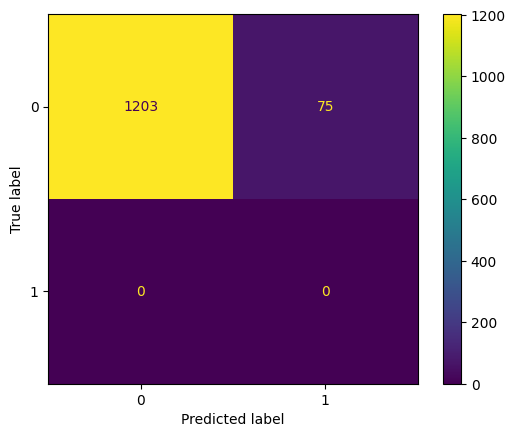

In [165]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(yp,y_test)
d=ConfusionMatrixDisplay(cm).plot()

K NEAREST NEIGHBOUR

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

kk=KNeighborsClassifier(n_neighbors=15)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
kk.fit(x_train,y_train)
print(kk.score(x_test,y_test))
knn2 = KNeighborsClassifier(n_neighbors=20)
knn2.fit(x_train,y_train)
print(knn2.score(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9393346379647749
0.9393346379647749


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

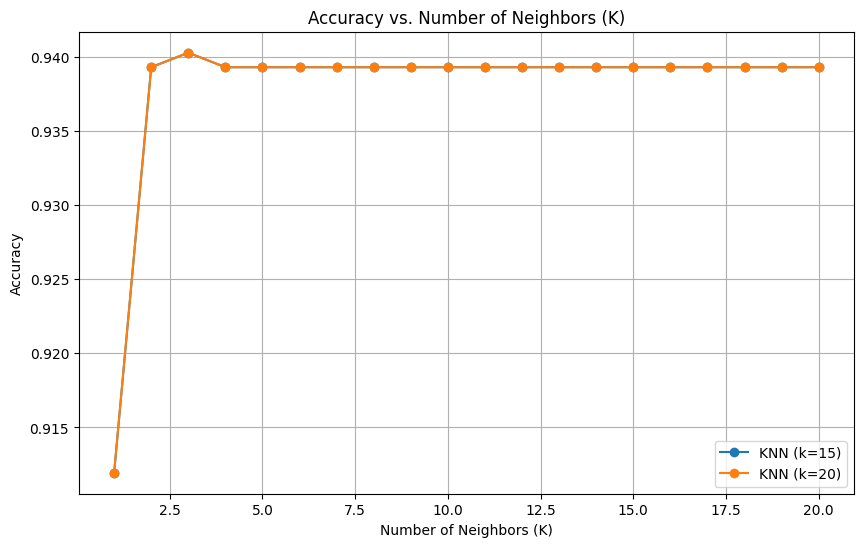

In [167]:
k_values = list(range(1, 21))
accuracy_scores_kk = []
accuracy_scores_knn2 = []
for k in k_values:
    kk = KNeighborsClassifier(n_neighbors=k)
    knn2 = KNeighborsClassifier(n_neighbors=k)

    kk.fit(x_train, y_train)
    knn2.fit(x_train, y_train)
    accuracy_scores_kk.append(kk.score(x_test, y_test))
    accuracy_scores_knn2.append(knn2.score(x_test, y_test))
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores_kk, label='KNN (k=15)', marker='o')
plt.plot(k_values, accuracy_scores_knn2, label='KNN (k=20)', marker='o')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [168]:
print(y_test.shape)
print(yp.shape)

(1022, 1)
(1278,)


SUPPORT VECTOR MACHINE

In [169]:
from sklearn import svm
SVM= svm.SVC()
mm=SVM.fit(x_train, y_train)
print("Training Accuracy",mm.score(x_train,y_train))
print("Testing Accuracy",mm.score(x_test,y_test))
yp=mm.predict(x_test)
yp

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy 0.9542563600782779
Testing Accuracy 0.9393346379647749


array([0, 0, 0, ..., 0, 0, 0])

In [170]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(yp,y_test))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Accuracy :  0.9393346379647749
(4088, 9)
(4088, 1)
(1022, 9)
(1022, 1)


In [171]:
precision = precision_score(y_test, yp)
print(precision)
recall = recall_score(y_test, yp)
print(recall)
f1 = f1_score(y_test, yp)
print(f1)
classification_rep = classification_report(y_test, yp)
print("Classification Report:")
print(classification_rep)

0.0
0.0
0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

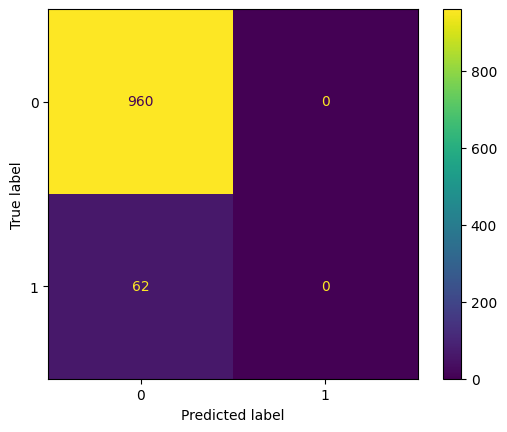

In [172]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
SVMS=confusion_matrix(y_test,yp)
d=ConfusionMatrixDisplay(SVMS).plot()

DECISION TREE CLASSIFIER

In [173]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
mm=dtc.fit(x_train,y_train)
print("Training Accuracy",mm.score(x_train,y_train))
print("Testing Accuracy",mm.score(x_test,y_test))
yp=mm.predict(x_test)
yp

Training Accuracy 1.0
Testing Accuracy 0.9217221135029354


array([0, 0, 0, ..., 1, 0, 0])

In [174]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(yp,y_test))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Accuracy :  0.9217221135029354
(4088, 9)
(4088, 1)
(1022, 9)
(1022, 1)


In [175]:
precision = precision_score(y_test, yp)
print(precision)
recall = recall_score(y_test, yp)
print(recall)
f1 = f1_score(y_test, yp)
print(f1)
classification_rep = classification_report(y_test, yp)
print("Classification Report:")
print(classification_rep)

0.3269230769230769
0.27419354838709675
0.29824561403508776
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       960
           1       0.33      0.27      0.30        62

    accuracy                           0.92      1022
   macro avg       0.64      0.62      0.63      1022
weighted avg       0.92      0.92      0.92      1022



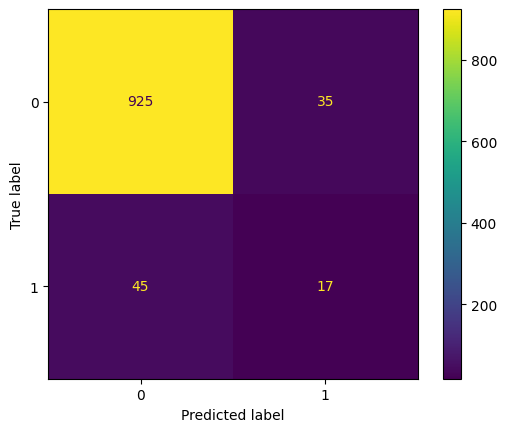

In [176]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
dtcc=confusion_matrix(y_test,yp)
d=ConfusionMatrixDisplay(dtcc).plot()

RANDOM FOREST

In [177]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
mm=rfc.fit(x_train,y_train)
print("Training Accuracy",mm.score(x_train,y_train))
print("Testing Accuracy",mm.score(x_test,y_test))
yp=mm.predict(x_test)
yp

<ipython-input-177-d3f28f73df98>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mm=rfc.fit(x_train,y_train)


Training Accuracy 1.0
Testing Accuracy 0.9363992172211351


array([0, 0, 0, ..., 0, 0, 0])

In [178]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(yp,y_test))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Accuracy :  0.9363992172211351
(4088, 9)
(4088, 1)
(1022, 9)
(1022, 1)


In [179]:
precision = precision_score(y_test, yp)
print(precision)
recall = recall_score(y_test, yp)
print(recall)
f1 = f1_score(y_test, yp)
print(f1)
classification_rep = classification_report(y_test, yp)
print("Classification Report:")
print(classification_rep)

0.0
0.0
0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



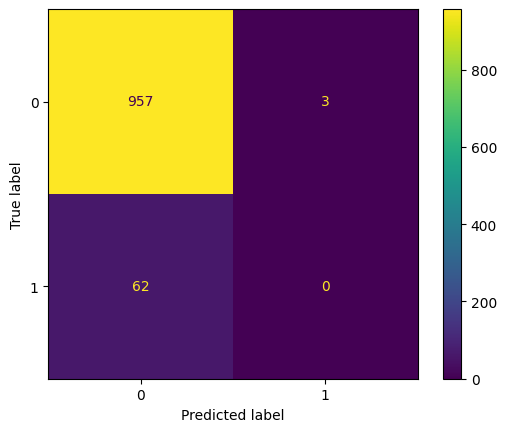

In [180]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
rfcc=confusion_matrix(y_test,yp)
d=ConfusionMatrixDisplay(rfcc).plot()

XG BOOSTING

In [181]:
import numpy as np
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
print(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


[0 0 0 ... 0 0 0]
Accuracy: 0.9285714285714286


In [182]:
precision = precision_score(y_test, y_pred)
print(precision)
recall = recall_score(y_test, y_pred)
print(recall)
f1 = f1_score(y_test, y_pred)
print(f1)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

0.21052631578947367
0.06451612903225806
0.09876543209876543
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       960
           1       0.21      0.06      0.10        62

    accuracy                           0.93      1022
   macro avg       0.58      0.52      0.53      1022
weighted avg       0.90      0.93      0.91      1022



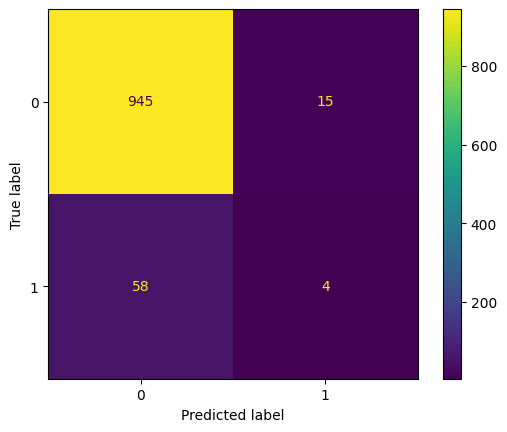

In [183]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
gbdtt=confusion_matrix(y_test,y_pred)
d=ConfusionMatrixDisplay(gbdtt).plot()

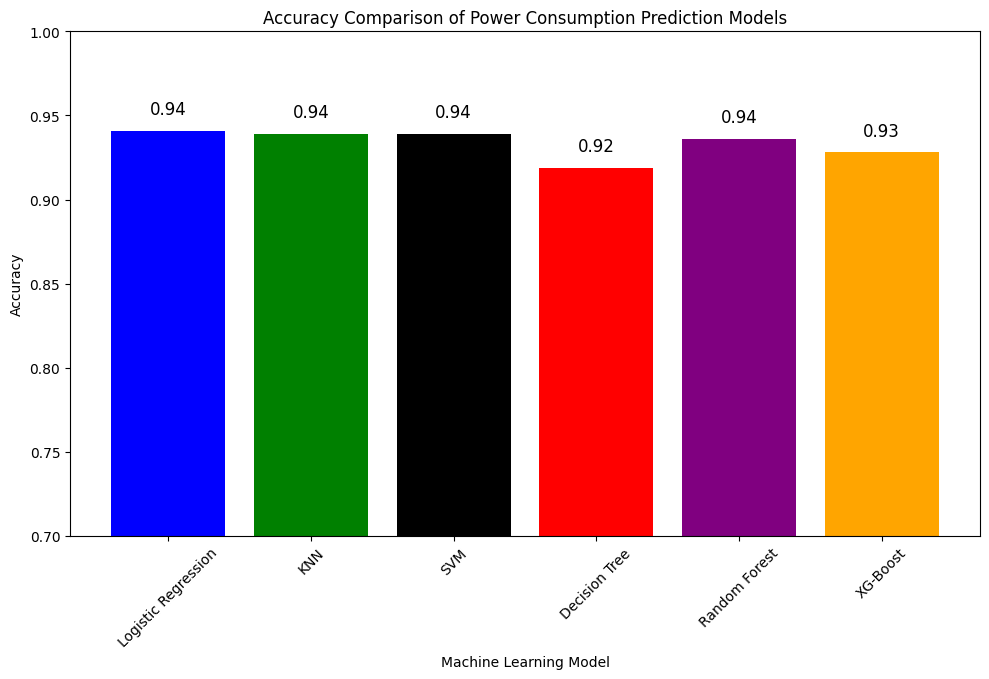

In [184]:
import matplotlib.pyplot as plt
model_names = ['Logistic Regression','KNN', 'SVM', 'Decision Tree', 'Random Forest', 'XG-Boost']
accuracies = [0.941, 0.939,0.939, 0.919, 0.936, 0.928]
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'black','red', 'purple', 'orange', 'cyan','lavender'])
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Power Consumption Prediction Models')
plt.ylim(0.7, 1.0)
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', fontsize=12)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
